In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Task 1a

In [2]:
u = np.array([10, 8]).reshape(-1, 1)
u

array([[10],
       [ 8]])

In [3]:
h = np.array([6, 3]).reshape(-1, 1)
h

array([[6],
       [3]])

In [4]:
x0 = np.array([12, 4]).reshape(-1, 1)
disp0 = 1
x0

array([[12],
       [ 4]])

In [5]:
x1 = np.array([5, 7]).reshape(-1, 1)
disp1 = 1.5
x1

array([[5],
       [7]])

In [6]:
d0 = 3.9
d1 = 4.5
d0, d1

(3.9, 4.5)

In [7]:
def dist(pt0, pt1):
    assert pt0.shape == pt1.shape, 'different sizes'
    return np.linalg.norm(pt0 - pt1)

In [8]:
r_u_x0 = dist(u, x0)
r_u_x1 = dist(u, x1)
r_u_x0, r_u_x1

(np.float64(4.47213595499958), np.float64(5.0990195135927845))

In [9]:
r_h_x0 = dist(h, x0)
r_h_x1 = dist(h, x1)
r_h_x0, r_h_x1

(np.float64(6.082762530298219), np.float64(4.123105625617661))

In [10]:
def normal_distribution(x, mean, std):
    return 1/std/np.sqrt(2*np.pi) * np.exp(-(x - mean)**2 / 2 / std**2)

In [11]:
prob_d0_u = normal_distribution(d0, r_u_x0, np.sqrt(disp0))
prob_d1_u = normal_distribution(d1, r_u_x1, np.sqrt(disp1))
prob_d0_u, prob_d1_u

(np.float64(0.33871090985583024), np.float64(0.2890142705141623))

In [12]:
prob_d0_h = normal_distribution(d0, r_h_x0, np.sqrt(disp0))
prob_d1_h = normal_distribution(d1, r_h_x1, np.sqrt(disp1))
prob_d0_h, prob_d1_h

(np.float64(0.03684023587082293), np.float64(0.3106709774737565))

In [13]:
prob_u = prob_d0_u * prob_d1_u
prob_u

np.float64(0.09789228652717095)

In [14]:
prob_h = prob_d0_h * prob_d1_h
prob_h

np.float64(0.011445192088352305)

In [15]:
print('university' if prob_u > prob_h else 'home')

university


## Task 1b

In [16]:
pts = np.hstack([h, u, x0, x1])

x_min, x_max = np.min(pts[0, :]) - 2, np.max(pts[0, :]) + 2
y_min, y_max = np.min(pts[1, :]) - 2, np.max(pts[1, :]) + 2

x = np.linspace(x_min, x_max, 100, endpoint=True)
y = np.linspace(y_min, y_max, 100, endpoint=True)
x_vals, y_vals = np.meshgrid(x, y)
coords = np.vstack([x_vals.ravel(), y_vals.ravel()])

r0 = np.array([dist(x0, pt.reshape(-1, 1)) for pt in coords.T])
r1 = np.array([dist(x1, pt.reshape(-1, 1)) for pt in coords.T])

probs_d0 = normal_distribution(d0, r0, np.sqrt(disp0))
probs_d1 = normal_distribution(d1, r1, np.sqrt(disp1))

probs = probs_d0 * probs_d1
probs.shape

(10000,)

In [17]:
a = np.array([2, 4]).reshape(-1, 1)
b = np.array([6, 3]).reshape(-1, 1)
c = b.reshape(-1)
dist(a, b), dist(a, c)

AssertionError: different sizes

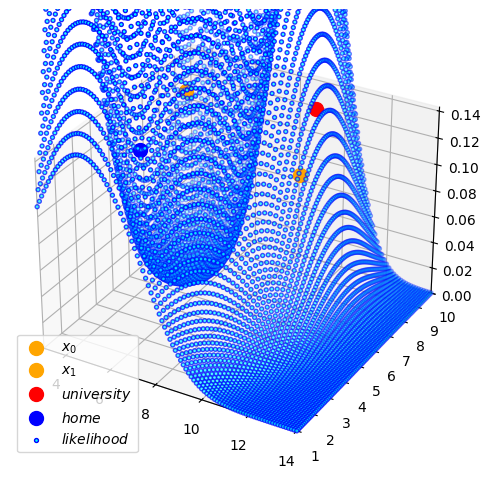

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.view_init(elev=90, azim=0)

height = np.max(probs)*1.1

ax.scatter(x0[0, 0], x0[1, 0], height, color='orange', s=100, label=r'$x_0$')
ax.scatter(x1[0, 0], x1[1, 0], height, color='orange', s=100, label=r'$x_1$')
ax.scatter(u[0, 0], u[1, 0], height, color='r', s=100, label=r'$university$')
ax.scatter(h[0, 0], h[1, 0], height, color='b', s=100, label=r'$home$')
ax.scatter(coords[0, :], coords[1, :], probs_d1, color='cyan', s=8, label=r'$likelihood$', edgecolors='b')

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([0, height])

plt.legend()
plt.tight_layout()
plt.show()

## Task 1c

In [19]:
p_u = 0.3
p_h = 0.7

prob_u_new = prob_u * p_u
prob_h_new = prob_h * p_h

print(f'u: old = {prob_u}, new = {prob_u_new}; h: old = {prob_h}, new = {prob_h_new}')

u: old = 0.09789228652717095, new = 0.029367685958151285; h: old = 0.011445192088352305, new = 0.008011634461846613


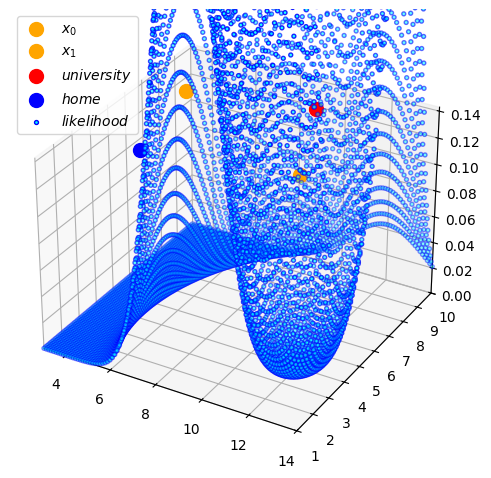

In [20]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.view_init(elev=90, azim=0)

height = np.max(probs)*1.1

ax.scatter(x0[0, 0], x0[1, 0], height, color='orange', s=100, label=r'$x_0$')
ax.scatter(x1[0, 0], x1[1, 0], height, color='orange', s=100, label=r'$x_1$')
ax.scatter(u[0, 0], u[1, 0], height, color='r', s=100, label=r'$university$')
ax.scatter(h[0, 0], h[1, 0], height, color='b', s=100, label=r'$home$')
ax.scatter(coords[0, :], coords[1, :], probs_d0, color='cyan', s=8, label=r'$likelihood$', edgecolors='b')

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([0, height])

plt.legend()
plt.tight_layout()
plt.show()